### Going Deeper(CV)_DJ2

# 9.물체를 분리하자! - 세그멘테이션 살펴보기




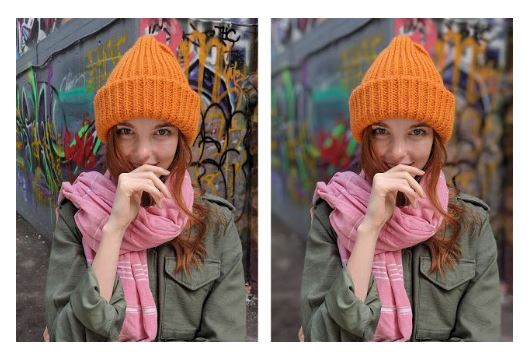

- **세그멘테이션(segmentation)은 픽셀 수준**에서 이미지의 각 부분이 어떤 의미를 갖는 영역인지 분리해 내는 방법.

### 이미지 분할 기술이다.

### 9-2. 세그멘테이션 문제의 종류

- 1) 시맨틱 세그멘테이션(semantic segmentation)
- 2) 인스턴스 세그멘테이션(instance segmentation)


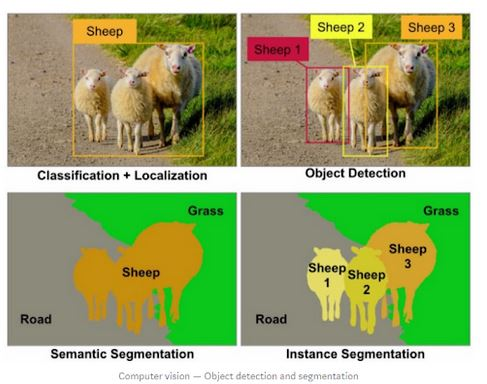

- 좌하단의 경우 양, 길, 풀밭의 영역을 구분해냄.
- 우하단의 경우 각 양의 개체들의 영역을 픽셀 단위로 정확히 구분. **인스턴스 세그멘테이션**

## 1) 시맨틱 세그멘테이션(Semantic Segmentation)



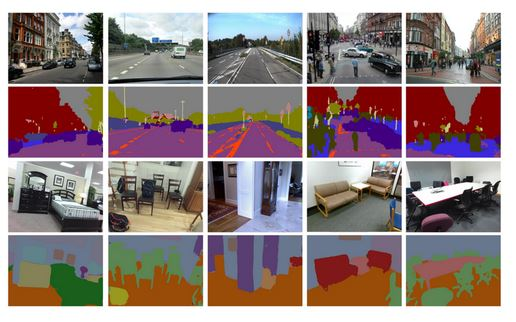

https://mi.eng.cam.ac.uk/projects/segnet/#demo 캡처

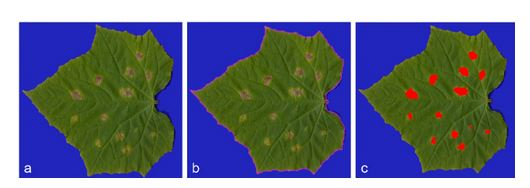

https://www.researchgate.net/figure/The-example-cucumber-leaf-images-a-scanned-image-before-segmentation-with-necrotic_fig2_273959785

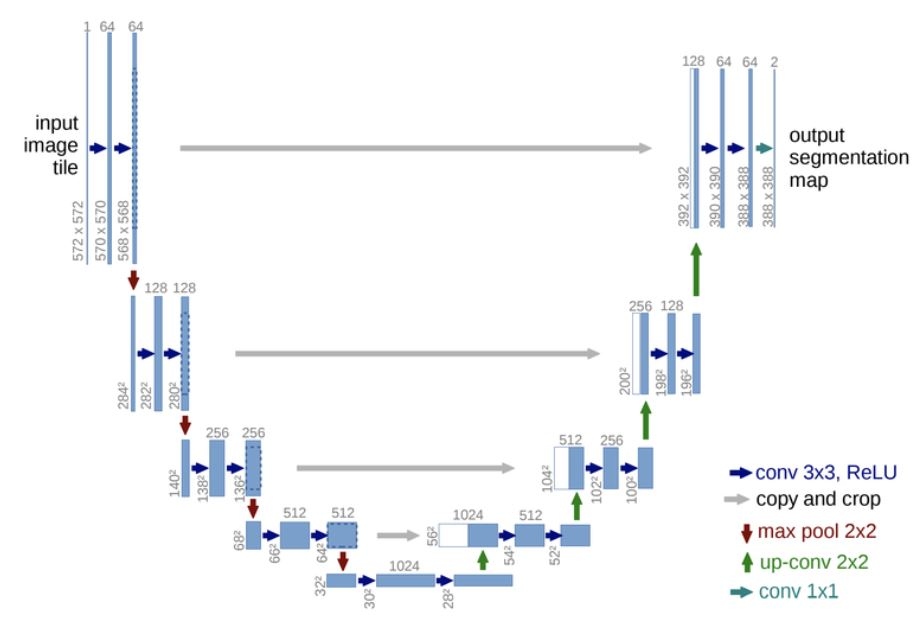

- https://arxiv.org/pdf/1505.04597.pdf

- 시맨틱 세그멘테이션의 대표적인 모델인 U-Net의 구조.
- 572x572 크기 이미지 입력. 388x388의 크기에 두 가지의 클래스를 가진 세그멘테이션 맵이 출력.

- 두 가지의 클래스를 문제에 따라 다르게 정의하면 **클래스에 따른 세그멘테이션 맵(semantic segmentation map)을 얻을 수 있다.

## 2) 인스턴스 세그멘테이션

- 물체 검출(object detection) 모델로 각 개체를 구분하고 이후에 각 개체 별로 시맨틱 세그멘테이션을 수행.

- Faster-R-CNN의 아이디어인 Region of Interest Pooling Layer(RoIPool) 개념을 개선하여 정확한 Segmentation에 유리하게 한 1️⃣RoIAlign, 그리고 2️⃣클래스별 마스크 분리라는 단순한 두 가지 아이디어를 통해, 클래스별 Object Detection과 시멘틱 세그멘테이션을 사실상 하나의 Task로 엮어낸 것.

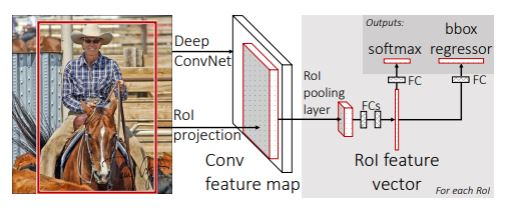

- RoIPool Layer는 다양한 RoI 영역을 Pooling을 통해 동일한 크기의 Feature map으로 추출해 내는 레이어입니다. 이후 이 고정 사이즈의 Feature map을 바탕으로 바운딩 박스와 object의 클래스를 추론해 냄.

- RoIPool 과정에서 Quantization이 필요하다는 점. **시맨틱 세그멘테이션의 정보손실과 왜곡을 야기하게 됨.

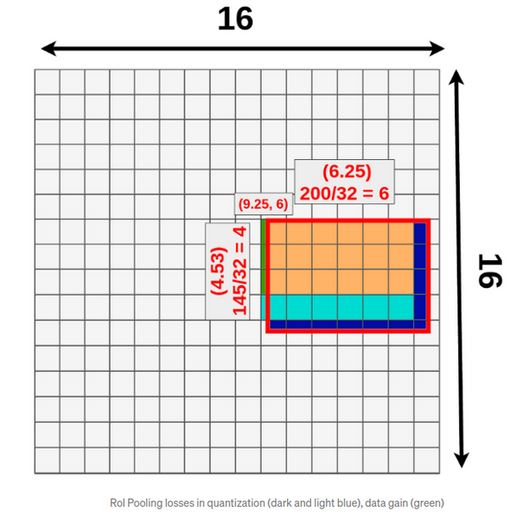

- https://towardsdatascience.com/understanding-region-of-interest-part-2-roi-align-and-roi-warp-f795196fc193

- Mask-R-CNN의 RoIAlign은 Quantization하지 않고도 RoI를 처리할 고정 사이즈의 Feature map을 생성할 수 있게 아이디어를 제공합니다. 아이디어의 핵심은, RoI 영역을 pooling layer의 크기에 맞추어 등분한 후, RoIPool을 했을 때의 quantization 영역 중 가까운 것들과의 bilinear interpolation 계산을 통해 생성해야 할 Feature Map을 계산해 낸다는 점.

- Mask R-CNN은 Faster R-CNN에서 특성 추출방식을 "RoIAlign" 방식으로 개선을 하고 세그멘테이션을 더한 방식입니다. 아래 Faster R-CNN과 비교한 구조도를 보면 U-Net처럼 피처 맵(feature map)의 크기를 키워 마스크(mask)를 생성해 내는 부분을 통해 인스턴스에 해당하는 영역, 즉 인스턴스 맵을 추론합니다. Mask R-CNN은 클래스에 따른 마스크를 예측할 때, 여러 가지 태스크를 한 모델로 학습하여 물체 검출의 성능을 높입니다.

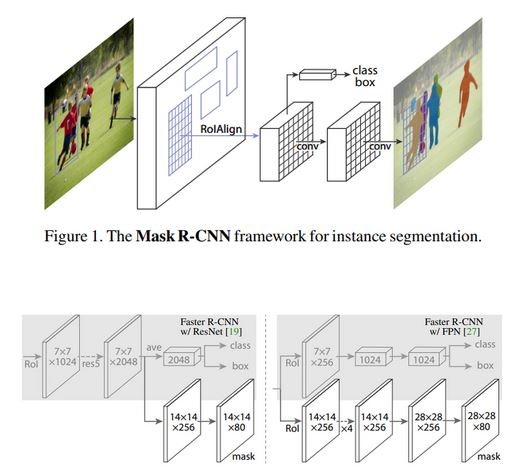

- Bounding box regression을 하는 Bbox head와 마스크를 예측하는 Mask Head의 두 갈래로 나뉘는 것을 볼 수 있는데요. Mask map의 경우 시맨틱 세그멘테이션과 달리 상대적으로 작은 28x28의 특성 맵 크기를 갖습니다. RoIAlign을 통해 줄어든 특성에서 마스크를 예측하기 때문에 사용하려는 목적에 따라서 정확한 마스크를 얻으려는 경우에는 부적합할 수 있습니다.

## 9-3. 주요 세그멘테이션 모델 (1) FCN


- FCN(Fully Convolutional Network)

> - 원본 논문 : https://arxiv.org/abs/1411.4038
> - 영상 : https://www.youtube.com/watch?v=_52dopGu3Cw&feature=youtu.be
> - 논문 리뷰 : https://medium.com/@msmapark2/fcn-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0-fully-convolutional-networks-for-semantic-segmentation-81f016d76204



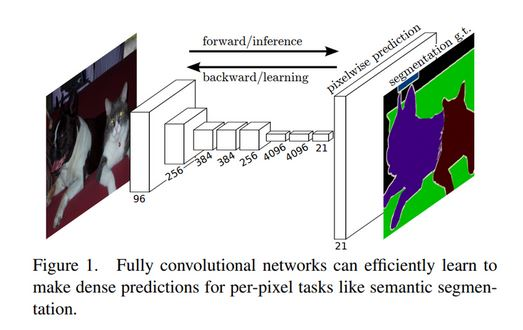

- FCN에서는 세그멘테이션을 하기 위해서 네트워크 뒷단에 fully connected layer 대신 CNN을 붙여줍니다.



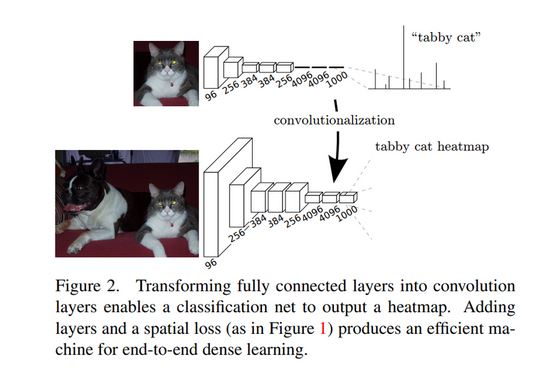

- CNN은 이미지 내 위치의 특성을 유지. 하지만 fully connected layer는 위치를 고려하지 않게 된다.

- 위치정보를 유지하면서 클래스 단위의 히트맵(heat map)을 얻어 세그멘테이션을 하기 위해, fully connected layer를 CNN으로 대체.

#### 마지막 CNN은 1x1의 커널 크기(kernel size)와 클래스의 개수만큼의 채널을 갖는다.

- CNN과 pooling 레이어를 거치면서 크기가 줄었기 때문에, 이를 키워주는 방법을 upsampling이라고 한다.

> - Deconvolution : 컨볼루션 연산을 거꾸로 해준 것.
> - Interpolation : 보간법으로 주어진 값들을 통해 추정해야 하는 (특성 맵의 크기가 커지면서 메꾸어야 하는 중간 픽셀들을 의미.)픽셀 추정하는 방법.


-     1차원 상의 두 개의 점 사이에서 거리 비에 따라 추정하는 것을 Linear interpolation이라고 합니다.
-    이를 2차원으로 확장해서 4개의 점 사이에서 어떤 점의 값을 추정하는 것을 Bilinear interpolation이라고 합니다.

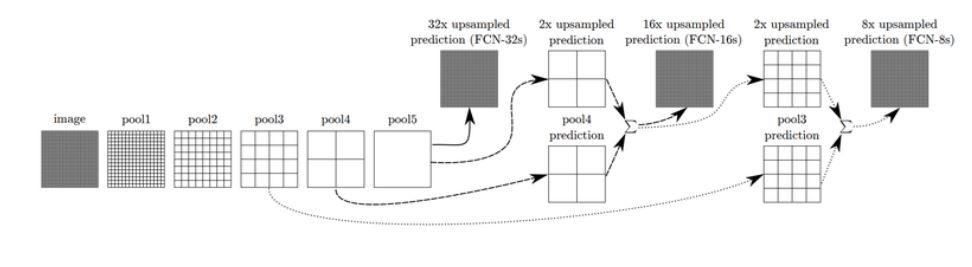

- Skip Architecture라는 방법입니다. 논문에서는 FCN-32s, FCN-16s, FCN-8s로 결과를 구분해 설명합니다. 
- FCN-16s는 앞쪽 블록에서 얻은 예측 결과 맵과, 2배로 upsampling한 맵을 더한 후, 한 번에 16배로 upsampling을 해주어 얻습니다. 
- 여기서 한 번 더 앞쪽 블록을 사용하면 FCN-8s를 얻을 수 있습니다.

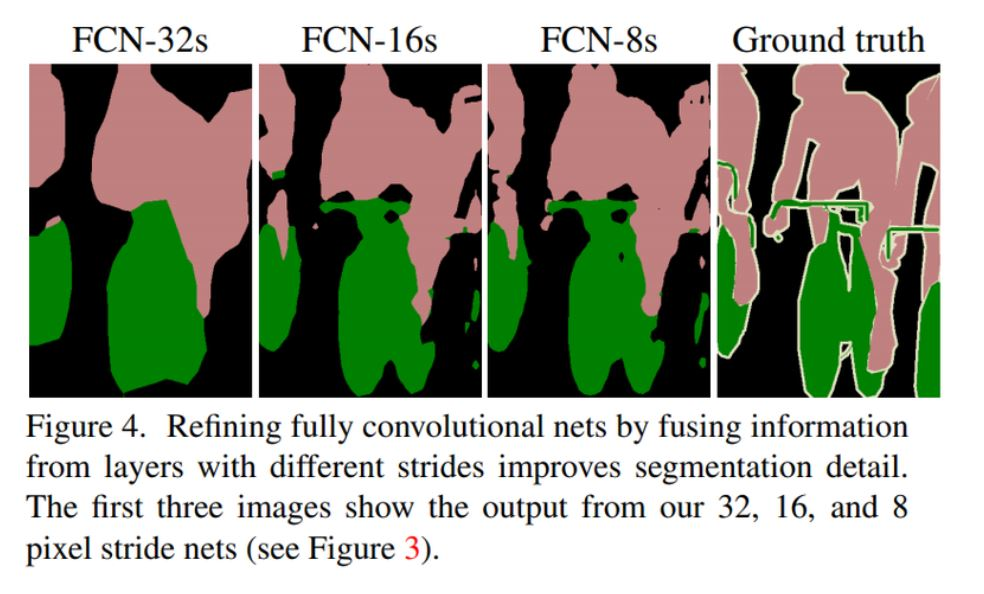

## 9-4. 주요 세그멘테이션 모델 (2) U-Net

> - 원본 논문 : https://arxiv.org/pdf/1505.04597.pdf
> - 논문 리뷰 : https://medium.com/@msmapark2/u-net-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0-u-net-convolutional-networks-for-biomedical-image-segmentation-456d6901b28a
> - 딥러닝논문읽기모임 : https://www.youtube.com/watch?v=evPZI9B2LvQ

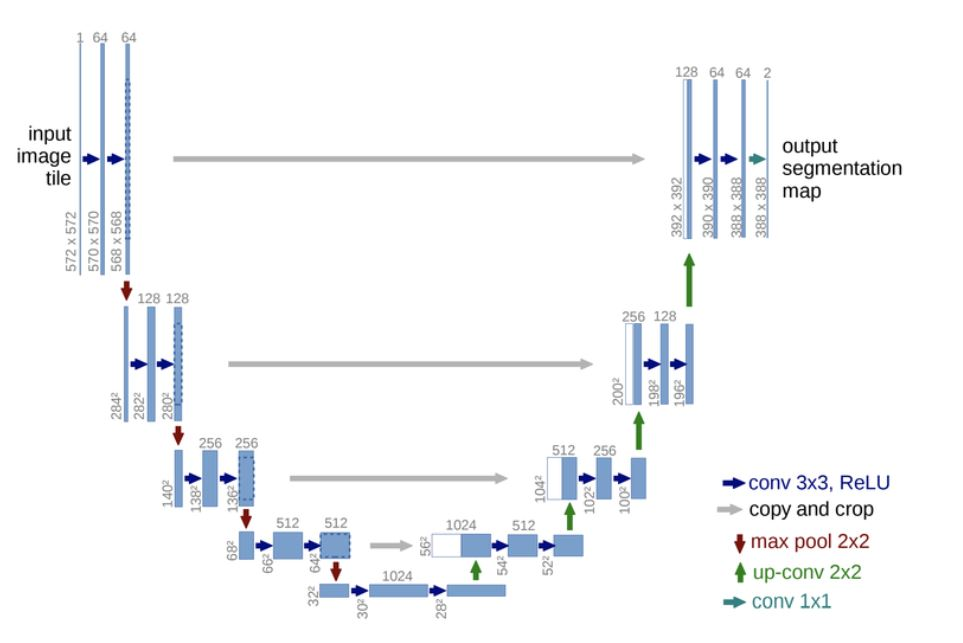

- U-Net은 이름에서 볼 수 있듯이 네트워크 구조가 U자 형태를 띠고 있습니다. FCN에서 upsampling을 통해서 특성 맵을 키운 것을 입력값과 대칭적으로 만들어 준 것인데요. 특이한 점은 U-Net이 세그멘테이션뿐만 아니라 여러 가지 이미지 태스크에서 사용되는 유명한 네트워크가 되었지만, 본래 의학 관련 논문으로 시작되었다는 점입니다. 논문 제목에서도 biomedical image segmentation을 위한 네트워크라는 점을 알 수 있습니다. 아래 Fig.2. 그림과 같이 세포의 영역을 세그멘테이션 하기 위해 개발된 방법입니다.

### 전체 구조

- 네트워크 구조를 좌측의 Contracting path와 우측의 Expansive path 두 가지로 구분합니다.

- 우측의 Contracting path는 일반적으로 우리가 사용해왔던 Convolution network와 유사한 구조를 가집니다. 각 블록은 두 개의 3x3 convolution 계층과 ReLu를 가지고 그 뒤로 downsampling을 위해서 2x2의 커널을 2 stride로 max pooling을 하게 됩니다. Downsampling을 거친 후 다음 convolution의 채널 크기는 두 배씩 늘어나도록 설계되었습니다.

- Expansive path에서는 각 블록에 2x2 up-convolution이 붙어 채널이 절반씩 줄어들고 특성 맵의 크기는 늘어납니다. Expansive path의 블록은 contracting block과 동일하게 3x3 convolution이 두 개씩 사용되었습니다.

- 두 Path에서 크기가 같은 블록의 출력과 입력은 skip connection처럼 연결해 주어 low-level의 feature를 활용할 수 있도록 하였습니다. 마지막에는 1x1 convolution으로 원하는 시맨틱 세그멘테이션 맵을 얻을 수 있습니다.

- 결과적으로는, 입력으로 572x572 크기인 이미지가 들어가고 출력으로 388x388의 크기에 두 가지의 클래스를 가진 세그멘테이션 맵(segmentation map)이 나옵니다.

- 마지막 세그멘테이션 맵의 크기가 입력 이미지와 다른 것은 앞에서 이야기한 것처럼 세그멘테이션 맵을 원하는 크기로 조정하여(resize) 해결할 수 있습니다. 원본 이미지에 맞게 크기를 조정해 주면 위에서 봤던 우리가 원하는 시맨틱 세그멘테이션 결과를 얻을 수 있게 되죠.

**Convolution은 padding을 통해서 크기를 같게 유지할 수 있으나, U-Net에선 padding을 하지않아서 deconvolution으로 확대하더라도 원래 이미지 크기가 될 수 없습니다.**

### 타일(Tile) 기법



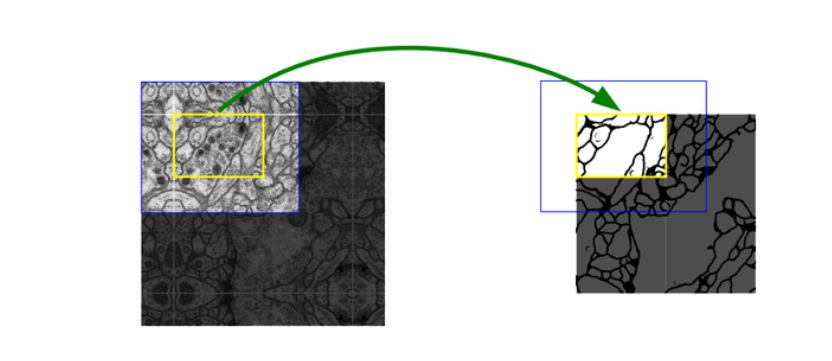

- U-Net이 downsampling과 upsampling(또는 인코딩과 디코딩)을 대칭으로 하는 점은 구조에서 한눈에 파악이 됩니다. 그럼 또 다른 차이는 뭘까요? 얻을 수 있는 세그멘테이션 맵의 해상도입니다. FCN은 입력 이미지의 크기를 조정하여 세그멘테이션 맵을 얻어냈습니다. 반면 U-Net은 타일(tile) 방식을 사용해서 어느 정도 서로 겹치는 구간으로 타일을 나누어 네트워크를 추론, 큰 이미지에서도 높은 해상도의 세그멘테이션 맵을 얻을 수 있도록 했습니다.

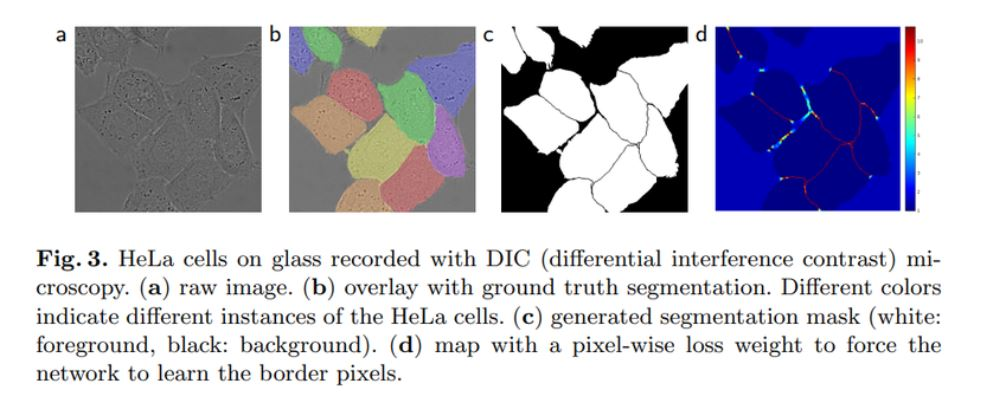

- 세포를 검출해 내기 위해서는 세포들의 영역뿐만 아니라 경계 또한 예측을 해야 합니다. 이때 픽셀 단위로 라벨을 매긴다고 생각하면, 데이터셋에 세포나 배경보다는 절대적으로 세포 간 경계의 면적이 작을 겁니다. 이러한 클래스 간 데이터 양의 불균형을 해결해 주기 위해서 분포를 고려한 weight map을 학습 때 사용했다고 합니다.

- 여기서 weight map의 weight를 신경망의 학습 파라미터를 가리키는 weight라고 착각할 수도 있을 것 같습니다. 실제로 여기서 말하는 weight는 손실 함수(loss)에 적용되는 가중치를 말합니다. 의료 영상에서 세포 내부나 배경보다는 상대적으로 면적이 작은 세포 경계를 명확하게 추론해 내는 것이 더욱 중요하기 때문에, 세포 경계의 손실에 더 많은 페널티를 부과하는 방식입니다.

## 9-5. 주요 세그멘테이션 모델 (3) DeepLab 계열

> - 원본 논문 : https://arxiv.org/pdf/1802.02611.pdf
> - 블로그 : https://blog.lunit.io/2018/07/02/deeplab-v3-encoder-decoder-with-atrous-separable-convolution-for-semantic-image-segmentation/
> - 블로그 :https://medium.com/hyunjulie/2%ED%8E%B8-%EB%91%90-%EC%A0%91%EA%B7%BC%EC%9D%98-%EC%A0%91%EC%A0%90-deeplab-v3-ef7316d4209d
> - 영상 : https://www.youtube.com/watch?v=JiC78rUF4iI 

### 전체 구조

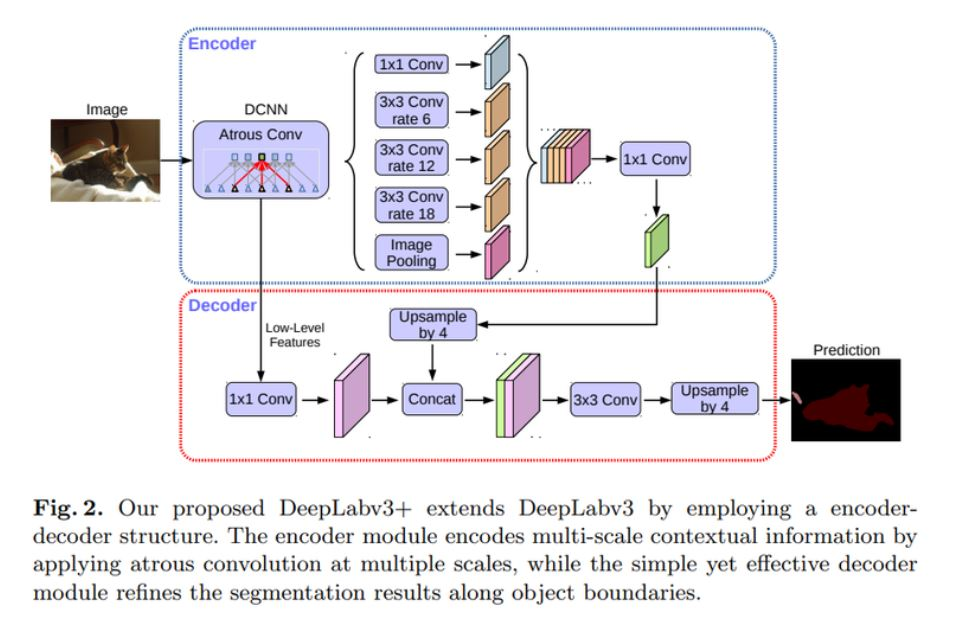

- U-Net에서의 Contracting path과 Expansive path의 역할을 하는 것이 여기서는 위 그림의 인코더(Encoder), 디코더(Decoder)입니다.

- 인코더는 이미지에서 필요한 정보를 특성으로 추출해 내는 모듈이고 디코더는 추출된 특성을 이용해 원하는 정보를 예측하는 모듈입니다. 3x3 convolution을 사용했던 U-Net과 달리 DeepLabV3+는 Atrous Convolution을 사용하고 있습니다. 그리고 이로 Atrous Convolution을 여러 크기에 다양하게 적용한 것이 ASPP(Atrous Spatial Pyramid Pooling)입니다. DeepLab V3+는 ASPP가 있는 블록을 통해 특성을 추출하고 디코더에서 Upsampling을 통해 세그멘테이션 마스크를 얻고 있습니다. 

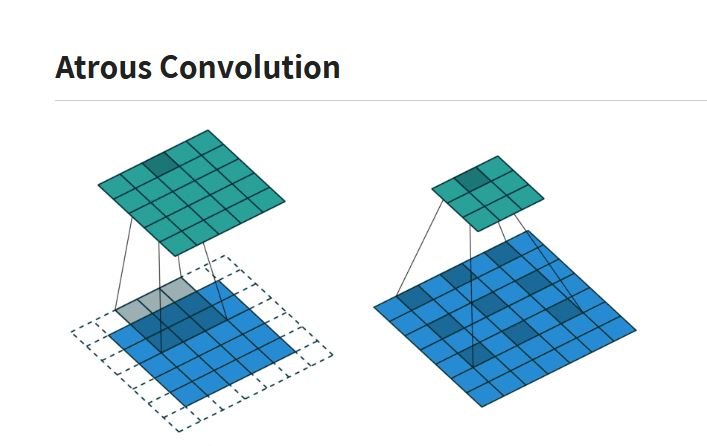

- Convolution 종류 : https://zzsza.github.io/data/2018/02/23/introduction-convolution/

- "띄엄띄엄 보는 컨볼루션"입니다. 위 그림에서 우측의 Atrous Convolution은 좌측의 일반적인 컨볼루션과 달리 더 넓은 영역을 보도록 해주기 위한 방법으로 커널이 일정 간격으로 떨어져 있습니다. 이를 통해 컨볼루션 레이어를 너무 깊게 쌓지 않아도 넓은 영역의 정보를 커버할 수 있게 됩니다.

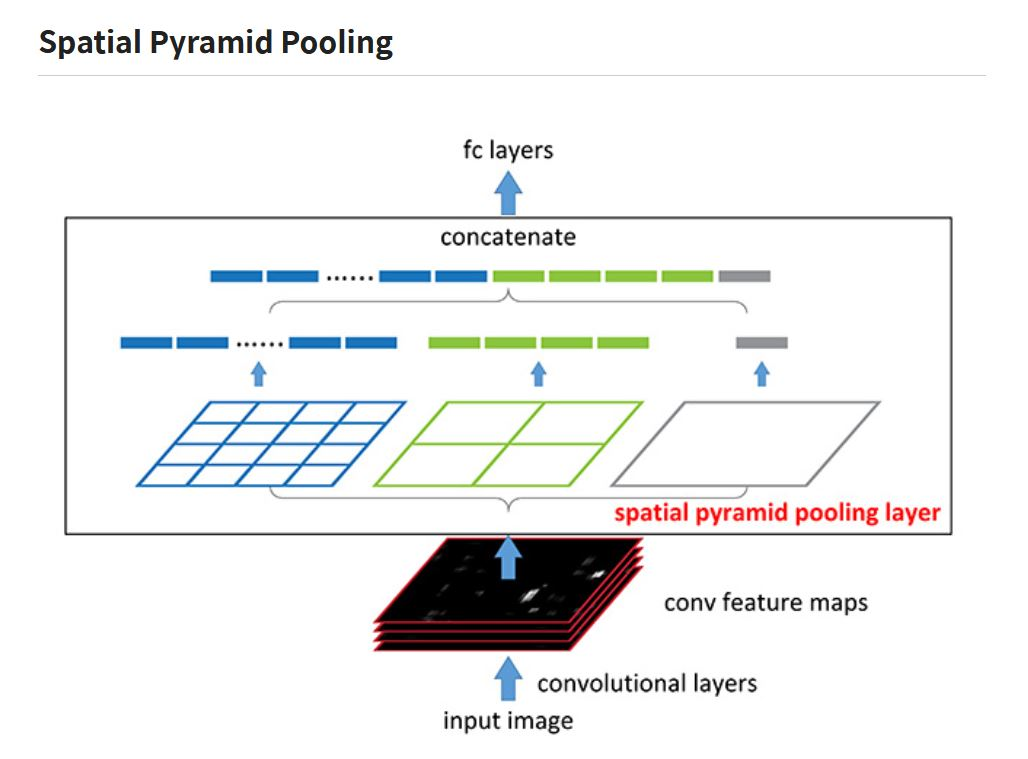

- https://yeomko.tistory.com/14

- Spatial Pyramid Pooling은 여러 가지 스케일로 convolution과 pooling을 하고 나온 다양한 특성을 연결(concatenate)해 줍니다. 이를 통해서 멀티스케일로 특성을 추출하는 것을 병렬로 수행하는 효과를 얻을 수 있습니다. 여기서 컨볼루션을 Atrous Convolution으로 바꾸어 적용한 것은 Atrous Spatial Pyramid Pooling이라고 합니다. 이러한 아키텍쳐는 입력 이미지의 크기와 관계없이 동일한 구조를 활용할 수 있다는 장점이 있습니다. 그러므로 제각기 다양한 크기와 비율을 가진 RoI 영역에 대해 적용하기에 유리합니다. 

## 9-6. 세그멘테이션의 평가

- 읽어보기 : https://www.jeremyjordan.me/evaluating-image-segmentation-models/



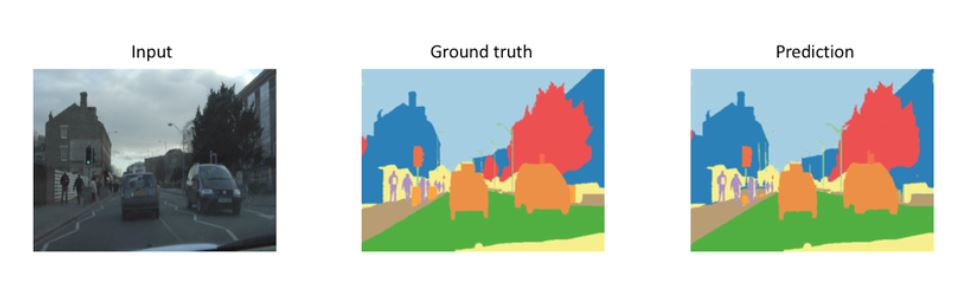

- 일반적으로 시맨틱 세그멘테이션의 결괏값은 이미지의 크기에 맞는 세그멘테이션 맵 크기 와 시맨틱 클래스의 수에 맞는 채널 크기 를 갖습니다. 여기서 각 채널의 max probability에 따라서 해당 위치의 클래스가 결정됩니다.
- 픽셀의 수만큼의 분류 문제로 평가할 수 있습니다.

### 1) 픽셀별 정확도(Pixel Accuracy)


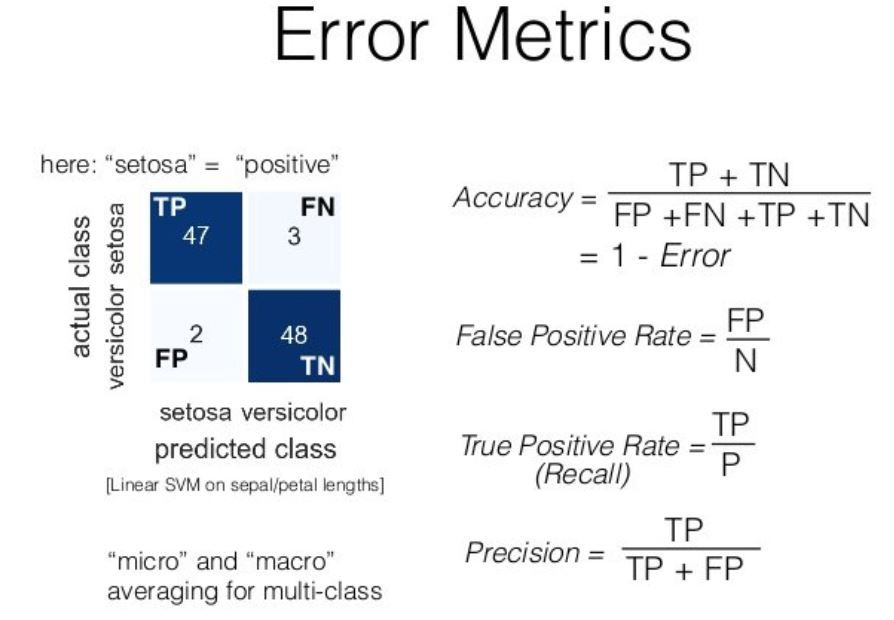

- Error Metrics를 확인하면 (TP+TN)/(FP+FN+TP+TN)으로 Accuracy를 구할 수 있습니다.
- TP(True positive)+ TN(True negative)는 옳게 분류된 샘플의 수로 잘못 예측된 한 칸을 제외한 15입니다.

### 2) 마스크 IoU (Mask Intersection-over-Union)

- 물체 검출 모델을 평가할 때는 정답 라벨(ground truth)와 예측 결과 바운딩 박스(prediction bounding box) 사이의 IoU(intersection over union)를 사용합니다.

#### sample for mask iou
intersection = np.logical_and(target, prediction)
union = np.logical_or(target, prediction)
iou_score = np.sum(intersection) / np.sum(union)

- 마스크 IoU를 클래스 별로 계산하면 한 이미지에서 여러 클래스에 대한 IoU 점수를 얻을 수 있습니다. 이를 평균하면 전체적인 시맨틱 세그멘테이션 성능을 가늠할 수 있습니다.

## 9-7. Upsampling의 다양한 방법

### 1) Nearest Neighbor


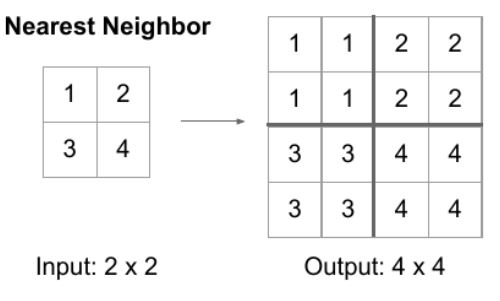

- Nearest upsampling은 이름 그대로 scale을 키운 위치에서 원본에서 가장 가까운 값을 그대로 적용하는 방법입니다. 위 그림처럼 2x2 matrix가 있을 때 이를 2배로 키우면 4x4의 matrix가 됩니다. 이때 좌측 상단으로부터 2x2는 입력 matrix의 1x1과 가장 가깝습니다. 따라서 해당 값을 그대로 사용하게 됩니다. 

### 2) Bilinear Interpolation

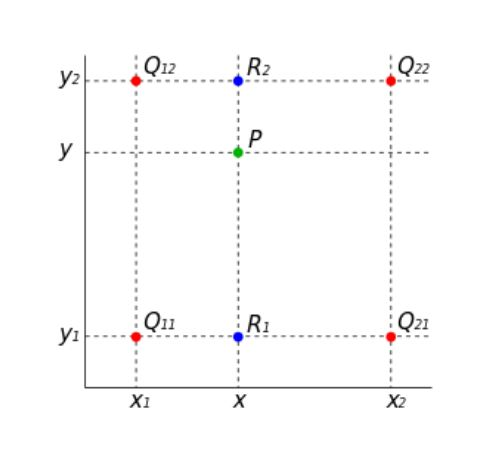

- Bilinear Interpolation은 두 축에 대해서 선형보간법을 통해 필요한 값을 메우는 방식입니다. 우리가 2x2 matrix를 4x4로 upsampling을 할 때 위의 이미지처럼 빈 값을을 채워야합니다. 이에 선형보간법(Linear interpolation)을 사용하는 것인데요, 이때 축을 두 방향으로 활용하기 때문에 Bilinear interpolation이라고 합니다.

- 위 그림에서 두 가지 interpolation을 적용한 것을 순서대로 확인할 수 있는데요. $$R_1이 Q_{11}과 Q_{21}의 x축방향의 interpolation 결과입니다. 그리고 R_2는 Q_{12}와 Q_{22}의 x축방향의 interpolation 결과입니다. 그리고 R_1과 R_2를 y축방향으로 interpolation하면 새로운 위치 P의 값을 추정할 수 있습니다. 이러한 선형 보간 방법으로 Interpolation을 하는 방법이 있고 Bicubic interpolation의 경우 삼차보간법을 사용합니다.$$ 

참고 자료 : https://bskyvision.com/m/789

### 3) Transposed Convolution

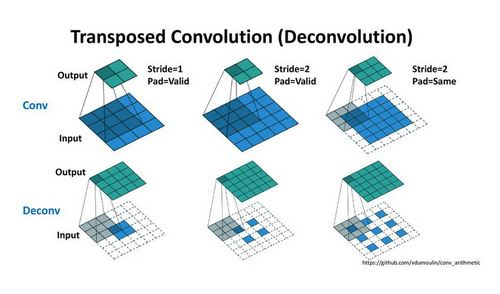

- Transposed Convolution이 그 방법 중 하나인데요. 우리가 사용해왔던 Convolution Layer는 Kernel의 크기를 정의하고 입력된 Feature를 Window에 따라서 output을 계산합니다. Transposed Convolution은 이와 반대의 연산을 합니다. 따라서 거꾸로 학습된 파라미터로 입력된 벡터를 통해 더 넓은 영역의 값을 추정해냅니다.

- 참고자료 : https://zzsza.github.io/data/2018/06/25/upsampling-with-transposed-convolution/